In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('election_results_2024.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'election_results_2024.csv'

In [ ]:
df.head()

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status
0,AJMER,13,BHAGIRATH CHOUDHARY,Bharatiya Janata Party,RAMCHANDRA CHOUDHARY,Indian National Congress,329991,Result Declared
1,ALWAR,8,BHUPENDER YADAV,Bharatiya Janata Party,LALIT YADAV,Indian National Congress,48282,Result Declared
2,AMBALA,1,VARUN CHAUDHRY,Indian National Congress,BANTO KATARIA,Bharatiya Janata Party,49036,Result Declared
3,ANANTNAG-RAJOURI,3,MIAN ALTAF AHMAD,Jammu & Kashmir National Conference,MEHBOOBA MUFTI,Jammu & Kashmir Peoples Democratic Party,281794,Result Declared
4,ARAKKONAM,7,S JAGATHRATCHAKAN,Dravida Munnetra Kazhagam,L VIJAYAN,All India Anna Dravida Munnetra Kazhagam,306559,Result Declared


In [ ]:
df.columns

Index(['Constituency', 'Const. No.', 'Leading Candidate', 'Leading Party',
       'Trailing Candidate', 'Trailing Party', 'Margin', 'Status'],
      dtype='object')

In [ ]:
# party with highest and lowest margin of victory

party_votes=df.groupby('Leading Party')['Margin'].sum().sort_values(ascending=False)
df['Margin']=pd.to_numeric(df['Margin'],errors='coerce')

highest_margin=df.iloc[df['Margin'].idxmax()]
highest_margin=df.iloc[df['Margin'].idxmin()]

C:\Users\shery\AppData\Local\Temp\ipykernel_21160\4229405518.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=seats_won.index,y=seats_won.values,palette='viridis')


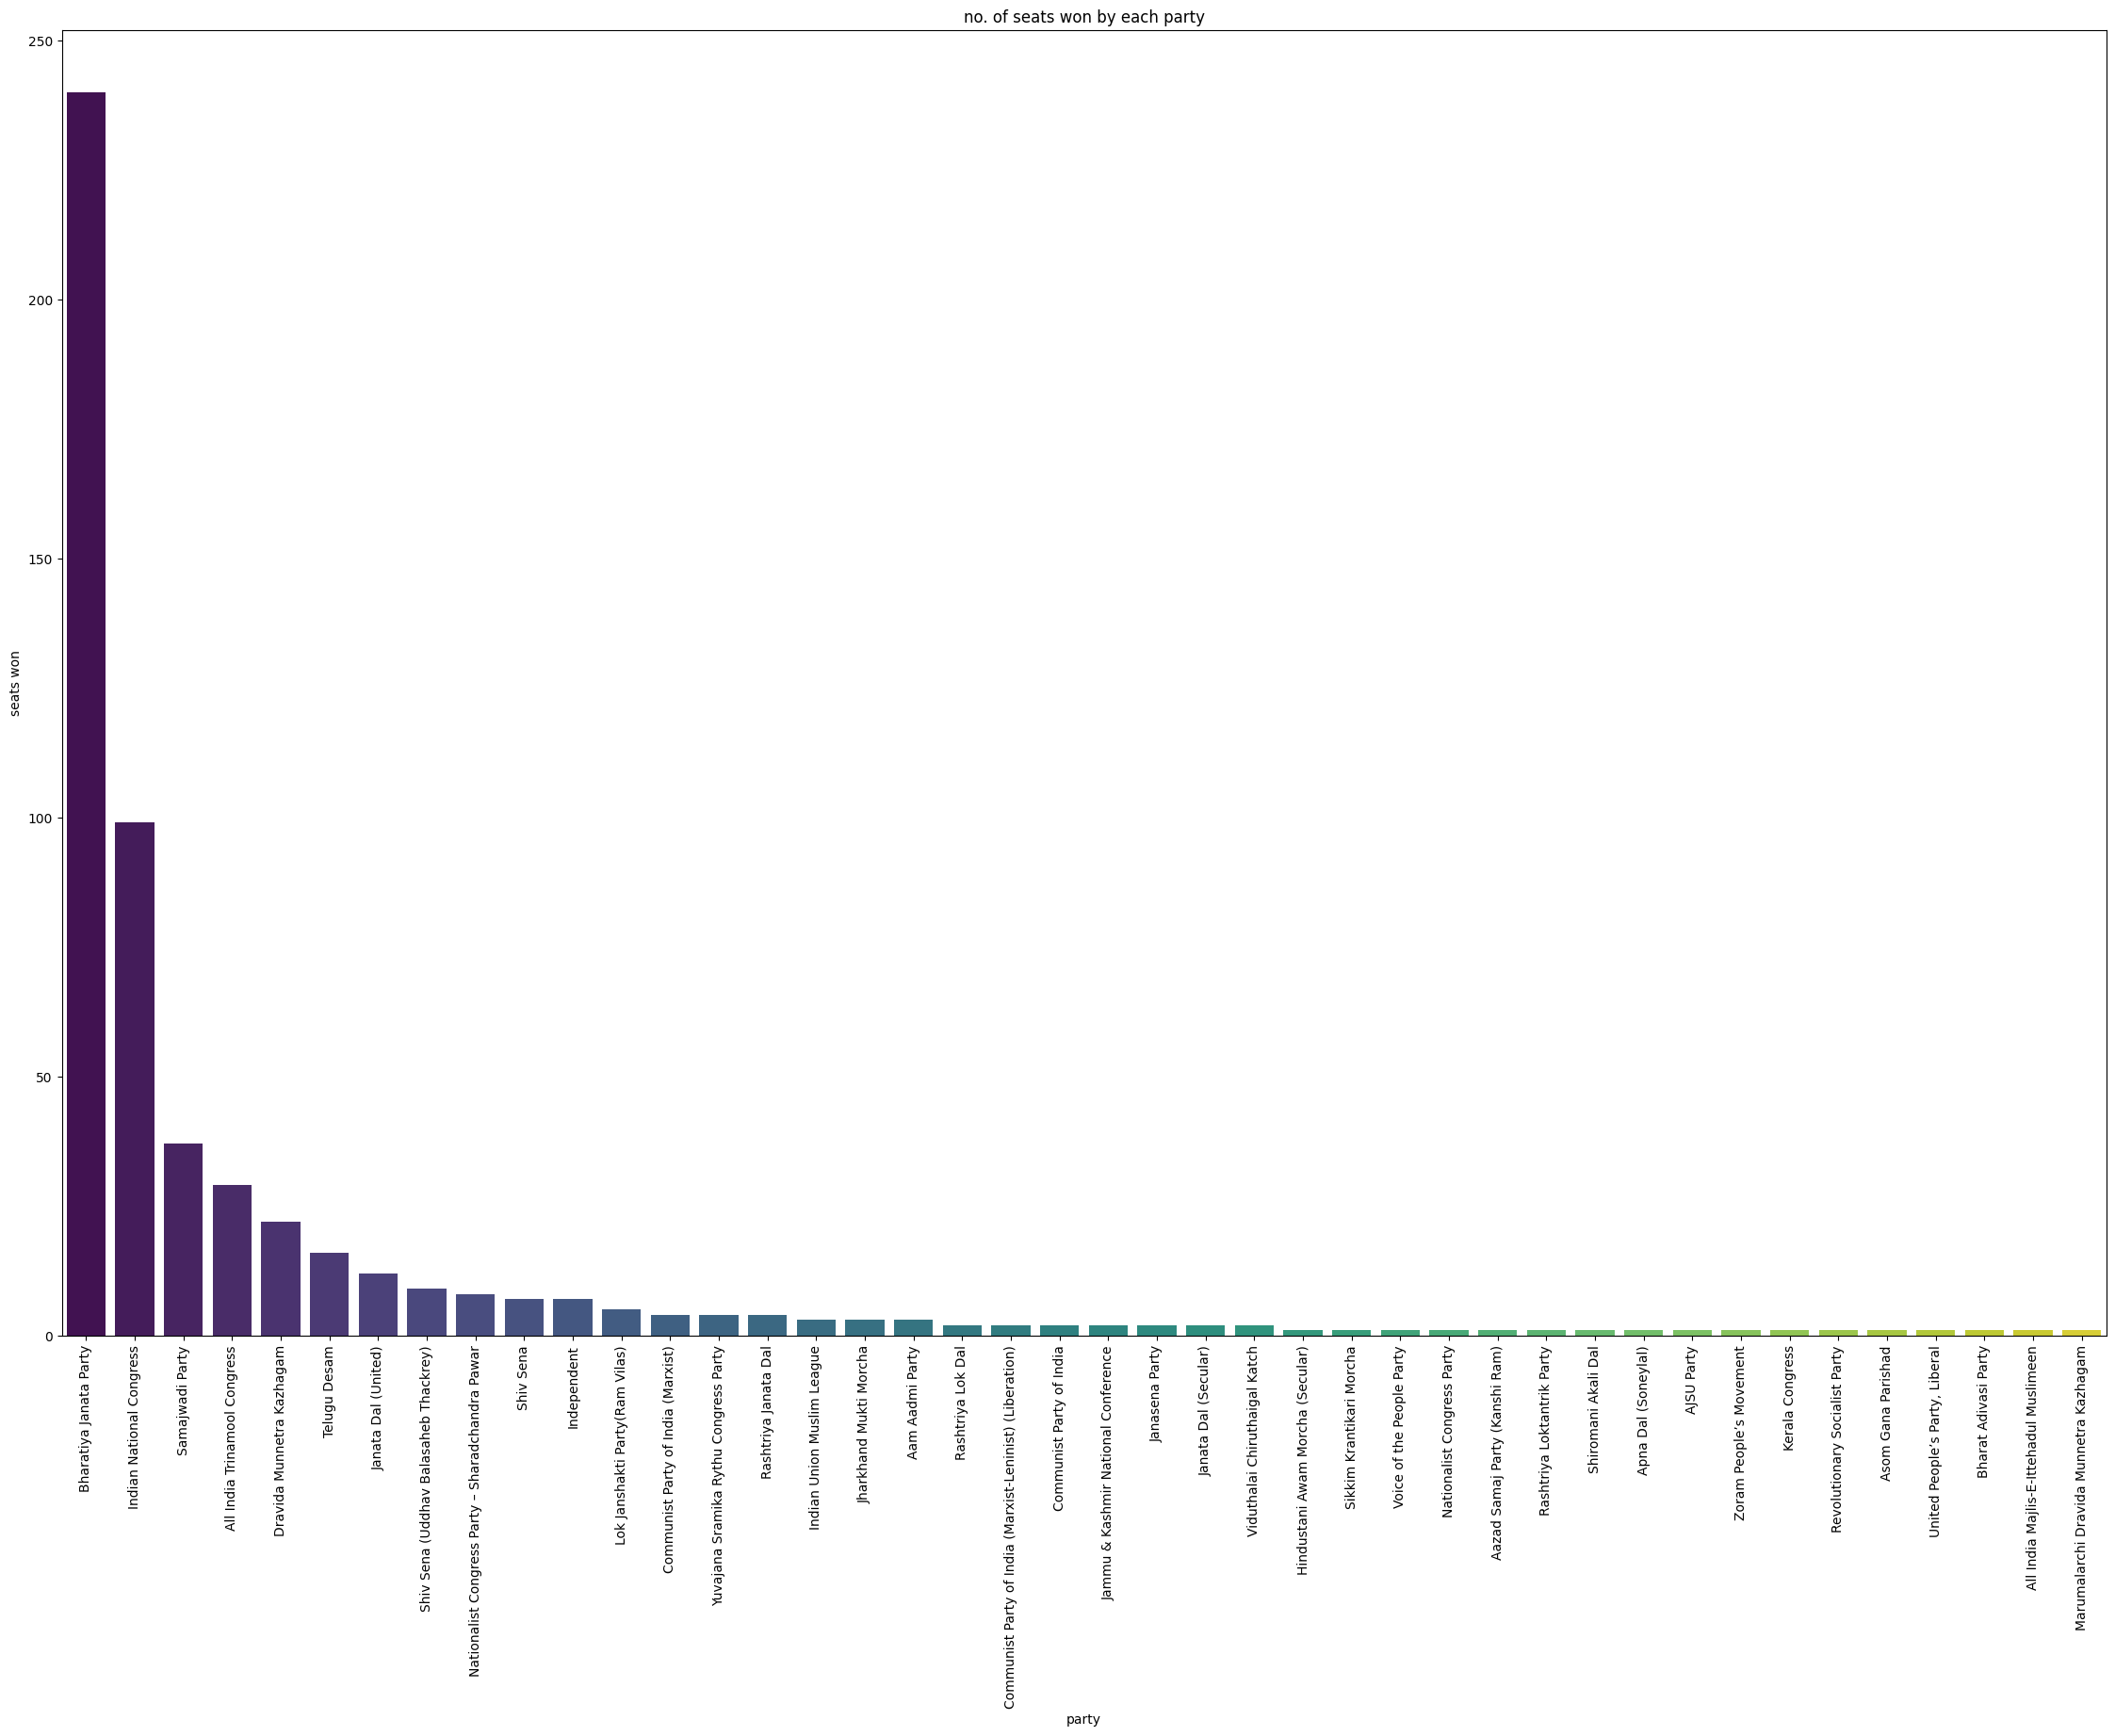

In [ ]:
# plot number of seats won by each party
leading_party_highest_votes=party_votes.idxmax()
leading_party_lowest_votes=party_votes.idxmin()
seats_won=df['Leading Party'].value_counts()
plt.figure(figsize=(28,18))
sns.barplot(x=seats_won.index,y=seats_won.values,palette='viridis')
plt.title('no. of seats won by each party')
plt.xlabel('party')
plt.ylabel('seats won')
plt.xticks(rotation=90)
plt.show()
           



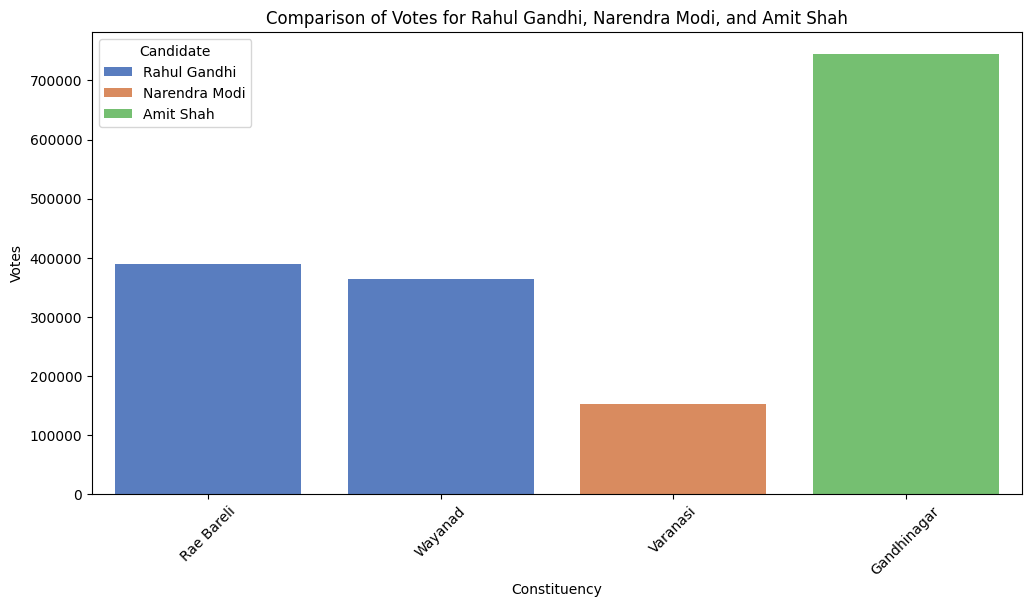

In [ ]:
rahul_entries = df[df['Leading Candidate'] == 'RAHUL GANDHI']
modi_entries = df[df['Leading Candidate'] == 'NARENDRA MODI']
amit_entries = df[df['Leading Candidate'] == 'AMIT SHAH']
# Get the votes for Rahul Gandhi, Narendra Modi, and Amit Shah
rahul_votes = rahul_entries['Margin'].values
modi_votes = modi_entries['Margin'].values[0] if not modi_entries.empty else 0
amit_votes = amit_entries['Margin'].values[0] if not amit_entries.empty else 0
# Get the original constituency names for Rahul Gandhi
rahul_constituencies = list(rahul_entries['Constituency'])
# Get the original constituency name for Narendra Modi
modi_constituency = modi_entries['Constituency'].values[0] if not modi_entries.empty else "Modi Constituency"
# Get the original constituency name for Amit Shah
amit_constituency = amit_entries['Constituency'].values[0] if not amit_entries.empty else "Amit Shah Constituency"
# Combine the data
data_to_plot = pd.DataFrame({
 'Candidate': ['Rahul Gandhi'] * len(rahul_votes) + ['Narendra Modi', 'Amit Shah'],
 'Constituency': rahul_constituencies + [modi_constituency, amit_constituency],
 'Votes': list(rahul_votes) + [modi_votes, amit_votes]
})
# Plot the comparison
plt.figure(figsize=(12, 6))
sns.barplot(data=data_to_plot, x='Constituency', y='Votes', hue='Candidate', palette='muted')
plt.title('Comparison of Votes for Rahul Gandhi, Narendra Modi, and Amit Shah')
plt.xlabel('Constituency')
plt.ylabel('Votes')
plt.xticks(rotation=45)
plt.show()

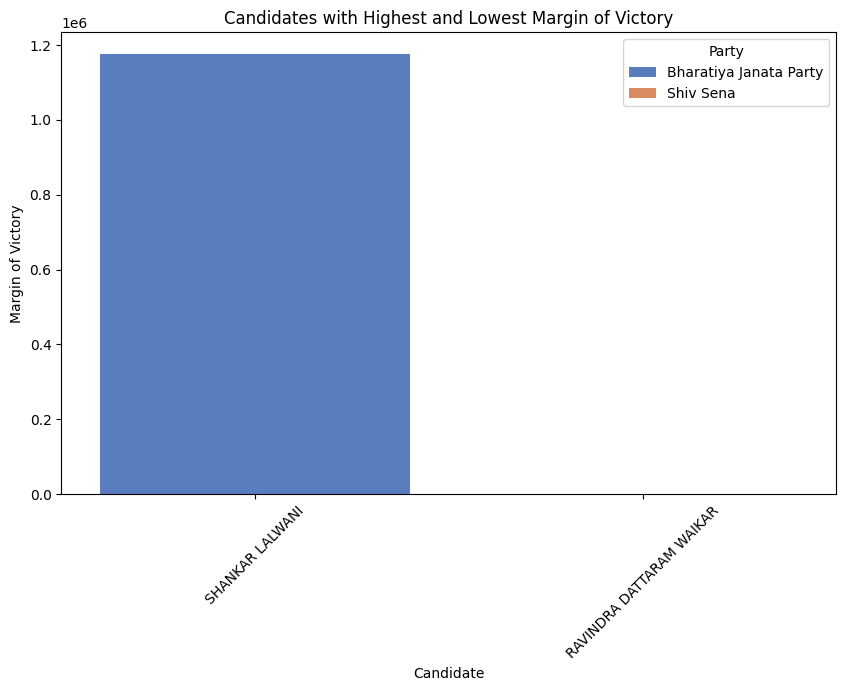

In [ ]:
# highest and lowest candidate victroy

highest_margin_entry = df.loc[df['Margin'].idxmax()]
lowest_margin_entry = df.loc[df['Margin'].idxmin()]
# Combine the data
data_to_plot = pd.DataFrame({
 'Candidate': [highest_margin_entry['Leading Candidate'], lowest_margin_entry['Leading Candidate']],
 'Party': [highest_margin_entry['Leading Party'], lowest_margin_entry['Leading Party']],
 'Margin': [highest_margin_entry['Margin'], lowest_margin_entry['Margin']]
})
# Plot the comparison
plt.figure(figsize=(10, 6))
sns.barplot(data=data_to_plot, x='Candidate', y='Margin', hue='Party', palette='muted')
plt.title('Candidates with Highest and Lowest Margin of Victory')
plt.xlabel('Candidate')
plt.ylabel('Margin of Victory')
plt.xticks(rotation=45)
plt.show()

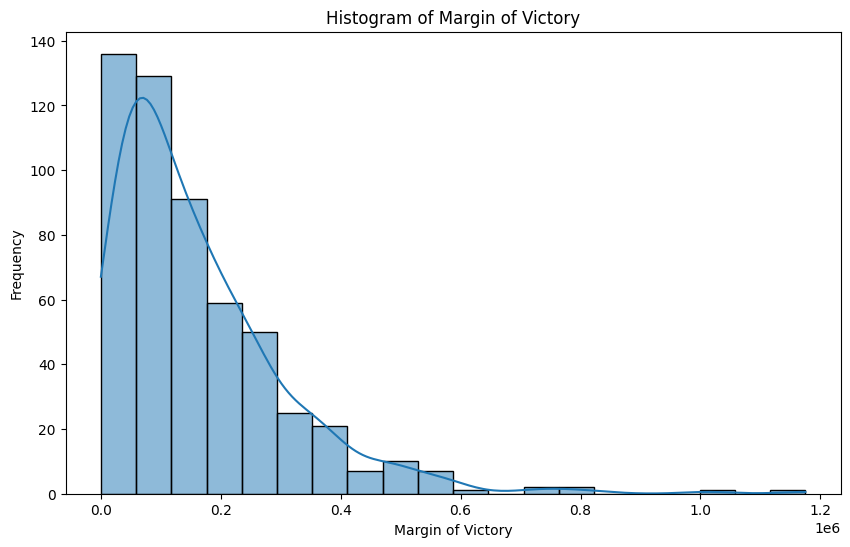

In [ ]:

#Votes distribution by party
plt.figure(figsize=(10, 6))
sns.histplot(df['Margin'], bins=20, kde=True)
plt.title('Histogram of Margin of Victory')
plt.xlabel('Margin of Victory')
plt.ylabel('Frequency')
plt.show()

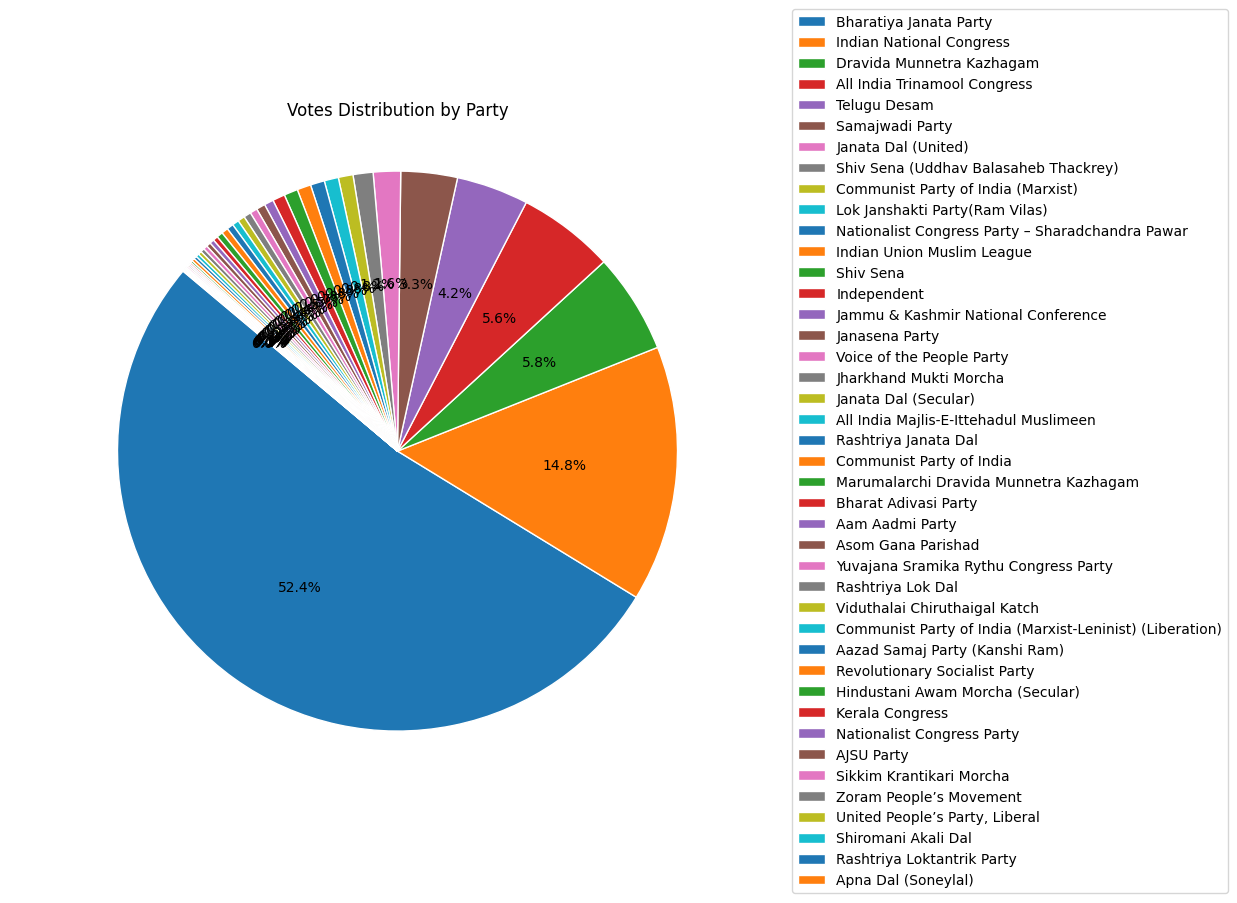

In [ ]:
party_votes = df.groupby('Leading Party')['Margin'].sum().sort_values(ascending=False)
# Plot pie chart
plt.figure(figsize=(10, 8))
wedges, texts, autotexts = plt.pie(party_votes, labels=None, autopct='%1.1f%%', startangle=140, wedgeprops=dict(edgecolor='w'))
plt.title('Votes Distribution by Party', pad=20)
plt.axis('equal')
plt.legend(labels=party_votes.index, loc='center left', bbox_to_anchor=(1, 0.5), fontsize='medium')
plt.show()

C:\Users\shery\AppData\Local\Temp\ipykernel_21160\881673477.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=trailing_party_votes.index[:10], y=trailing_party_votes.values[:10], palette='viridis')


Text(0, 0.5, 'Total Votes')

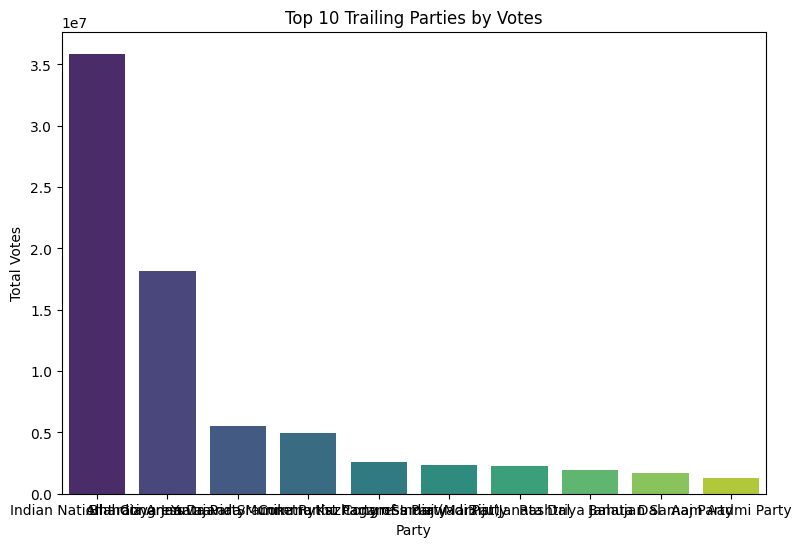

In [ ]:
trailing_party_votes = df.groupby('Trailing Party')['Margin'].sum().sort_values(ascending=False)
trailing_party_seats = df['Trailing Party'].value_counts()
plt.figure(figsize=(20, 6))
# Plot votes distribution by trailing party
plt.subplot(1, 2, 1)
sns.barplot(x=trailing_party_votes.index[:10], y=trailing_party_votes.values[:10], palette='viridis')
plt.title('Top 10 Trailing Parties by Votes')
plt.xlabel('Party')
plt.ylabel('Total Votes')

C:\Users\shery\AppData\Local\Temp\ipykernel_21160\982748432.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=trailing_party_seats.index[:10], y=trailing_party_seats.values[:10], palette='viridis')


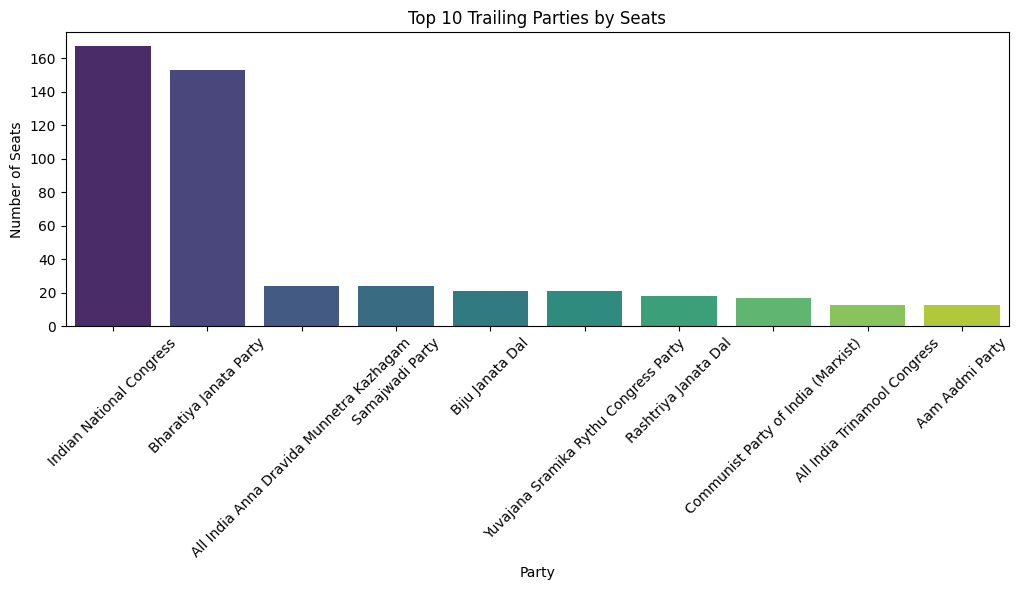

In [ ]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 2)
sns.barplot(x=trailing_party_seats.index[:10], y=trailing_party_seats.values[:10], palette='viridis')
plt.title('Top 10 Trailing Parties by Seats')
plt.xlabel('Party')
plt.ylabel('Number of Seats')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()